<a href="https://colab.research.google.com/github/Scott-Huston/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_112_Loading_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Loading, Cleaning and Visualizing Data

Objectives for today:
- Load data from multiple sources into a Python notebook 
 - !curl method
 - CSV upload method
- Create basic plots appropriate for different data types
 - Scatter Plot
 - Histogram
 - Density Plot
 - Pairplot
- "Clean" a dataset using common Python libraries
 - Removing NaN values "Interpolation"

# Part 1 - Loading Data

Data comes in many shapes and sizes - we'll start by loading tabular data, usually in csv format.

Data set sources:

- https://archive.ics.uci.edu/ml/datasets.html
- https://github.com/awesomedata/awesome-public-datasets
- https://registry.opendata.aws/ (beyond scope for now, but good to be aware of)

Let's start with an example - [data about flags](https://archive.ics.uci.edu/ml/datasets/Flags).

## Lecture example - flag data

In [1]:
# Step 1 - find the actual file to download

# From navigating the page, clicking "Data Folder"
flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'

# You can "shell out" in a notebook for more powerful tools
# https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html

# Funny extension, but on inspection looks like a csv
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

# Extensions are just a norm! You have to inspect to be sure what something is

Afghanistan,5,1,648,16,10,2,0,3,5,1,1,0,1,1,1,0,green,0,0,0,0,1,0,0,1,0,0,black,green
Albania,3,1,29,3,6,6,0,0,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,0,1,0,red,red
Algeria,4,1,2388,20,8,2,2,0,3,1,1,0,0,1,0,0,green,0,0,0,0,1,1,0,0,0,0,green,white
American-Samoa,6,3,0,0,1,1,0,0,5,1,0,1,1,1,0,1,blue,0,0,0,0,0,0,1,1,1,0,blue,red
Andorra,3,1,0,0,6,0,3,0,3,1,0,1,1,0,0,0,gold,0,0,0,0,0,0,0,0,0,0,blue,red
Angola,4,2,1247,7,10,5,0,2,3,1,0,0,1,0,1,0,red,0,0,0,0,1,0,0,1,0,0,red,black
Anguilla,1,4,0,0,1,1,0,1,3,0,0,1,0,1,0,1,white,0,0,0,0,0,0,0,0,1,0,white,blue
Antigua-Barbuda,1,4,0,0,1,1,0,1,5,1,0,1,1,1,1,0,red,0,0,0,0,1,0,1,0,0,0,black,red
Argentina,2,3,2777,28,2,0,0,3,2,0,0,1,0,1,0,0,blue,0,0,0,0,0,0,0,0,0,0,blue,blue
Argentine,2,3,2777,28,2,0,0,3,3,0,0,1,1,1,0,0,blue,0,0,0,0,1,0,0,0,0,0,blue,blue
Australia,6,2,7690,15,1,1,0,0,3,1,0,1,0,1,0,0,blue,0,1,1,1,6,0,0,0,0,0,white,blue
Austria,3,1,84,8,4,0,0,3,2,1,0,0,0,1,0,0,red,0,0,0,0,0,0,0,0,0,0,red,red
Bahamas,1,4,19,0,1,1,0,3,3,0,0,1,1,0,1,0,blue,0,0,

In [0]:
# Step 2 - load the data

# How to deal with a csv? 🐼
import pandas as pd
column_headers = #finish this
flag_data = pd.read_csv(flag_data_url, header = None, names = column_headers)



In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Step 3 - verify we've got *something*
flag_data.head()
?pd.read_csv

In [0]:
# Step 4 - Looks a bit odd - verify that it is what we want
flag_data.count()

Afghanistan    193
5              193
1              193
648            193
16             193
10             193
2              193
0              193
3              193
5.1            193
1.1            193
1.2            193
0.1            193
1.3            193
1.4            193
1.5            193
0.2            193
green          193
0.3            193
0.4            193
0.5            193
0.6            193
1.6            193
0.7            193
0.8            193
1.7            193
0.9            193
0.10           193
black          193
green.1        193
dtype: int64

In [0]:
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data | wc

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 15240  100 15240    0     0  92363      0 --:--:-- --:--:-- --:--:-- 92363
    194     194   15240


In [0]:
# So we have 193 observations with funny names, file has 194 rows
# Looks like the file has no header row, but read_csv assumes it does
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer, sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into DataFrame.
    
    Also supports option

In [0]:
?pd.read_csv

In [0]:
??pd.read_csv

In [0]:
# Alright, we can pass header=None to fix this
flag_data = pd.read_csv(flag_data_url, header=None)
flag_data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [0]:
flag_data.count()

0     194
1     194
2     194
3     194
4     194
5     194
6     194
7     194
8     194
9     194
10    194
11    194
12    194
13    194
14    194
15    194
16    194
17    194
18    194
19    194
20    194
21    194
22    194
23    194
24    194
25    194
26    194
27    194
28    194
29    194
dtype: int64

In [0]:
flag_data.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

### Yes, but what does it *mean*?

This data is fairly nice - it was "donated" and is already "clean" (no missing values). But there are no variable names - so we have to look at the codebook (also from the site).

```
1. name: Name of the country concerned
2. landmass: 1=N.America, 2=S.America, 3=Europe, 4=Africa, 4=Asia, 6=Oceania
3. zone: Geographic quadrant, based on Greenwich and the Equator; 1=NE, 2=SE, 3=SW, 4=NW
4. area: in thousands of square km
5. population: in round millions
6. language: 1=English, 2=Spanish, 3=French, 4=German, 5=Slavic, 6=Other Indo-European, 7=Chinese, 8=Arabic, 9=Japanese/Turkish/Finnish/Magyar, 10=Others
7. religion: 0=Catholic, 1=Other Christian, 2=Muslim, 3=Buddhist, 4=Hindu, 5=Ethnic, 6=Marxist, 7=Others
8. bars: Number of vertical bars in the flag
9. stripes: Number of horizontal stripes in the flag
10. colours: Number of different colours in the flag
11. red: 0 if red absent, 1 if red present in the flag
12. green: same for green
13. blue: same for blue
14. gold: same for gold (also yellow)
15. white: same for white
16. black: same for black
17. orange: same for orange (also brown)
18. mainhue: predominant colour in the flag (tie-breaks decided by taking the topmost hue, if that fails then the most central hue, and if that fails the leftmost hue)
19. circles: Number of circles in the flag
20. crosses: Number of (upright) crosses
21. saltires: Number of diagonal crosses
22. quarters: Number of quartered sections
23. sunstars: Number of sun or star symbols
24. crescent: 1 if a crescent moon symbol present, else 0
25. triangle: 1 if any triangles present, 0 otherwise
26. icon: 1 if an inanimate image present (e.g., a boat), otherwise 0
27. animate: 1 if an animate image (e.g., an eagle, a tree, a human hand) present, 0 otherwise
28. text: 1 if any letters or writing on the flag (e.g., a motto or slogan), 0 otherwise
29. topleft: colour in the top-left corner (moving right to decide tie-breaks)
30. botright: Colour in the bottom-left corner (moving left to decide tie-breaks)
```

Exercise - read the help for `read_csv` and figure out how to load the data with the above variable names. One pitfall to note - with `header=None` pandas generated variable names starting from 0, but the above list starts from 1...

## Loading from a local CSV to Google Colab

  is-democrat  ... export-administration-act-south-africa
0  republican  ...                                      y
1  republican  ...                                      a
2    democrat  ...                                      n
3    democrat  ...                                      y
4    democrat  ...                                      y

[5 rows x 17 columns]


# Part 2 - Basic Visualizations

## Basic Data Visualizations Using Matplotlib

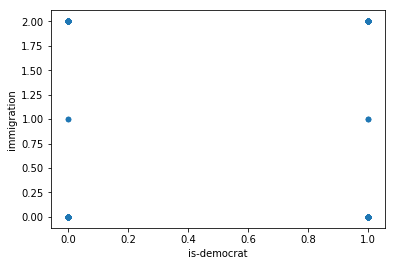

In [29]:
import matplotlib.pyplot as plt



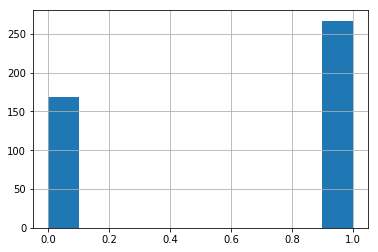

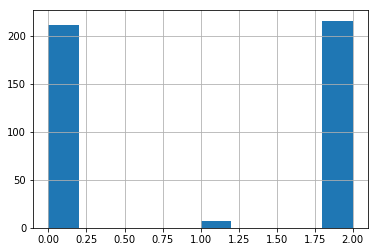

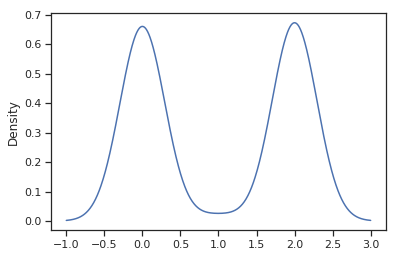

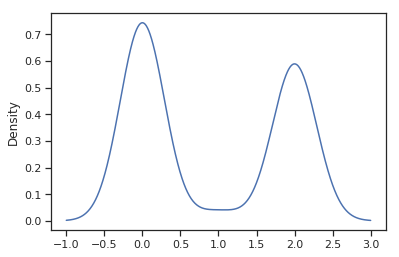

In [48]:
# Seaborn Density Plot



## Create the same basic Visualizations using Pandas

In [0]:
# Pandas Histogram - Look familiar?

In [0]:
# Pandas Scatterplot

In [0]:
# Pandas Scatter Matrix - Usually doesn't look too great.

# Part 3 - Deal with Missing Values

## Diagnose Missing Values

Lets use the Adult Dataset from UCI. <https://github.com/ryanleeallred/datasets>

## Fill Missing Values

## Your assignment - pick a dataset and do something like the above

This is purposely open-ended - you can pick any data set you wish. It is highly advised you pick a dataset from UCI or a similar semi-clean source. You don't want the data that you're working with for this assignment to have any bigger issues than maybe not having headers or including missing values, etc.

After you have chosen your dataset, do the following:

- Import the dataset using the method that you are least comfortable with (!curl or CSV upload).
 - Make sure that your dataset has the number of rows and columns that you expect.
 - Make sure that your dataset has appropriate column names, rename them if necessary.
 - If your dataset uses markers like "?" to indicate missing values, replace them with NaNs during import.
- Identify and fill missing values in your dataset (if any)
 - Don't worry about using methods more advanced than the `.fillna()` function for today.
- Create one of each of the following plots using your dataset
 - Scatterplot
 - Histogram
 - Density Plot
 - Pairplot (note that pairplots will take a long time to load with large datasets or datasets with many columns)

If you get that done and want to try more challenging or exotic things, go for it! Use documentation as illustrated above, and follow the 20-minute rule (that is - ask for help if you're stuck!).

If you have loaded a few traditional datasets, see the following section for suggested stretch goals.

**Importing and cleaning data:**

In [49]:
# importing libraries
import pandas as pd
import numpy as np

# creating column_headers list to create header row. The info is in the names file on UCI.

column_headers = ['is-democrat', 'handicapped-infants', 'water-project-cost-sharing', 'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                 'el-salvador-aid', 'religions-groups-in-schools', 'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                 'mx-missile', 'immigration', 'synfuels-corporation-cutback', 'education-spending', 'superfund-right-to-sue', 
                 'crime', 'duty-free-exports', 'export-administration-act-south-africa']

# downloading data using read_csv
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data', names = column_headers)

# Exploratory Data Analysis -----------

# print(df.head());
# df.isnull().sum()

# This says there is no null values, but the UCI site says there is missing data.
# Looking at the head, I can see that there are question marks in the data so I am going to replace them with null values
df.replace("?", np.NaN, inplace = True)

# Checking to make sure the question marks were replaced with null values correctly
# print(df.head());

# print(df.isnull().sum())

# Reading the names file from the UCI database, it says that question marks do not necessarily indicate missing data. Question markse mean the data was not yea or nea. The only other type of vote I can think of would be abstaining so I am going to replace the question marks with 'a' for abstain.
df.fillna('a', inplace = True)
# Checking to make sure that filled correctly
print(df.head())

# I now see that there is no header row, so I am changing the read_csv call in the beginning to handle that

  is-democrat  ... export-administration-act-south-africa
0  republican  ...                                      y
1  republican  ...                                      a
2    democrat  ...                                      n
3    democrat  ...                                      y
4    democrat  ...                                      y

[5 rows x 17 columns]


**Scatterplot:**

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


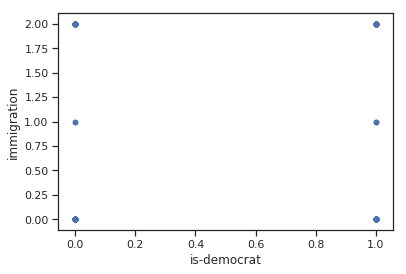

In [50]:
# Scatter Plot

# Converting the y/n/a strings to numbers
df.replace("n", 0, inplace = True)
df.replace("a", 1, inplace = True)
df.replace("y", 2, inplace = True)

# Converting Class Name values to boolean. I also renamed the column header in the column_headers list from 'Class Name' to 'is-democrat' to be more descriptive
df.replace("republican", 0, inplace = True)
df.replace("democrat", 1, inplace = True)
df.head()

# Created a scatterplot, but it isn't very useful because you cant see the amount of data at each point. I'm sure there's a way to make bigger dots or something if there's more data.
df.plot.scatter('is-democrat', 'immigration');

**Histogram:**

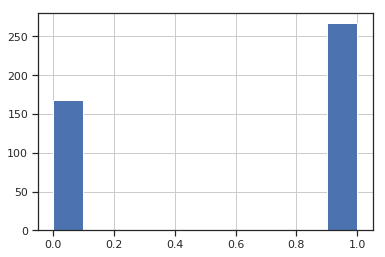

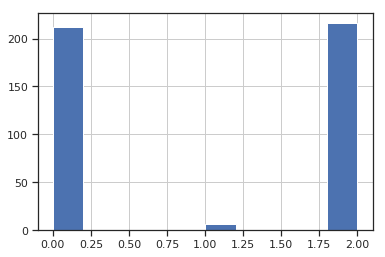

In [51]:
# Histogram

df['is-democrat'].hist()
plt.show()

df['immigration'].hist()
plt.show()

**Density Plot:**

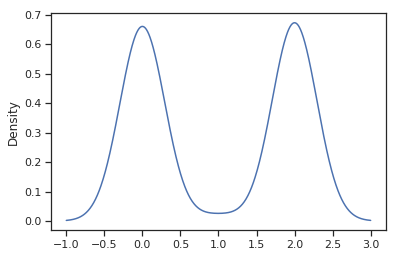

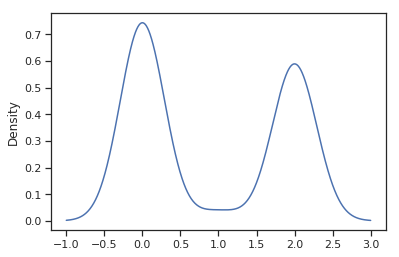

In [52]:
# Density Plot

df.immigration.plot.density()
plt.show()

df['handicapped-infants'].plot.density()
plt.show()

**Pairplot**

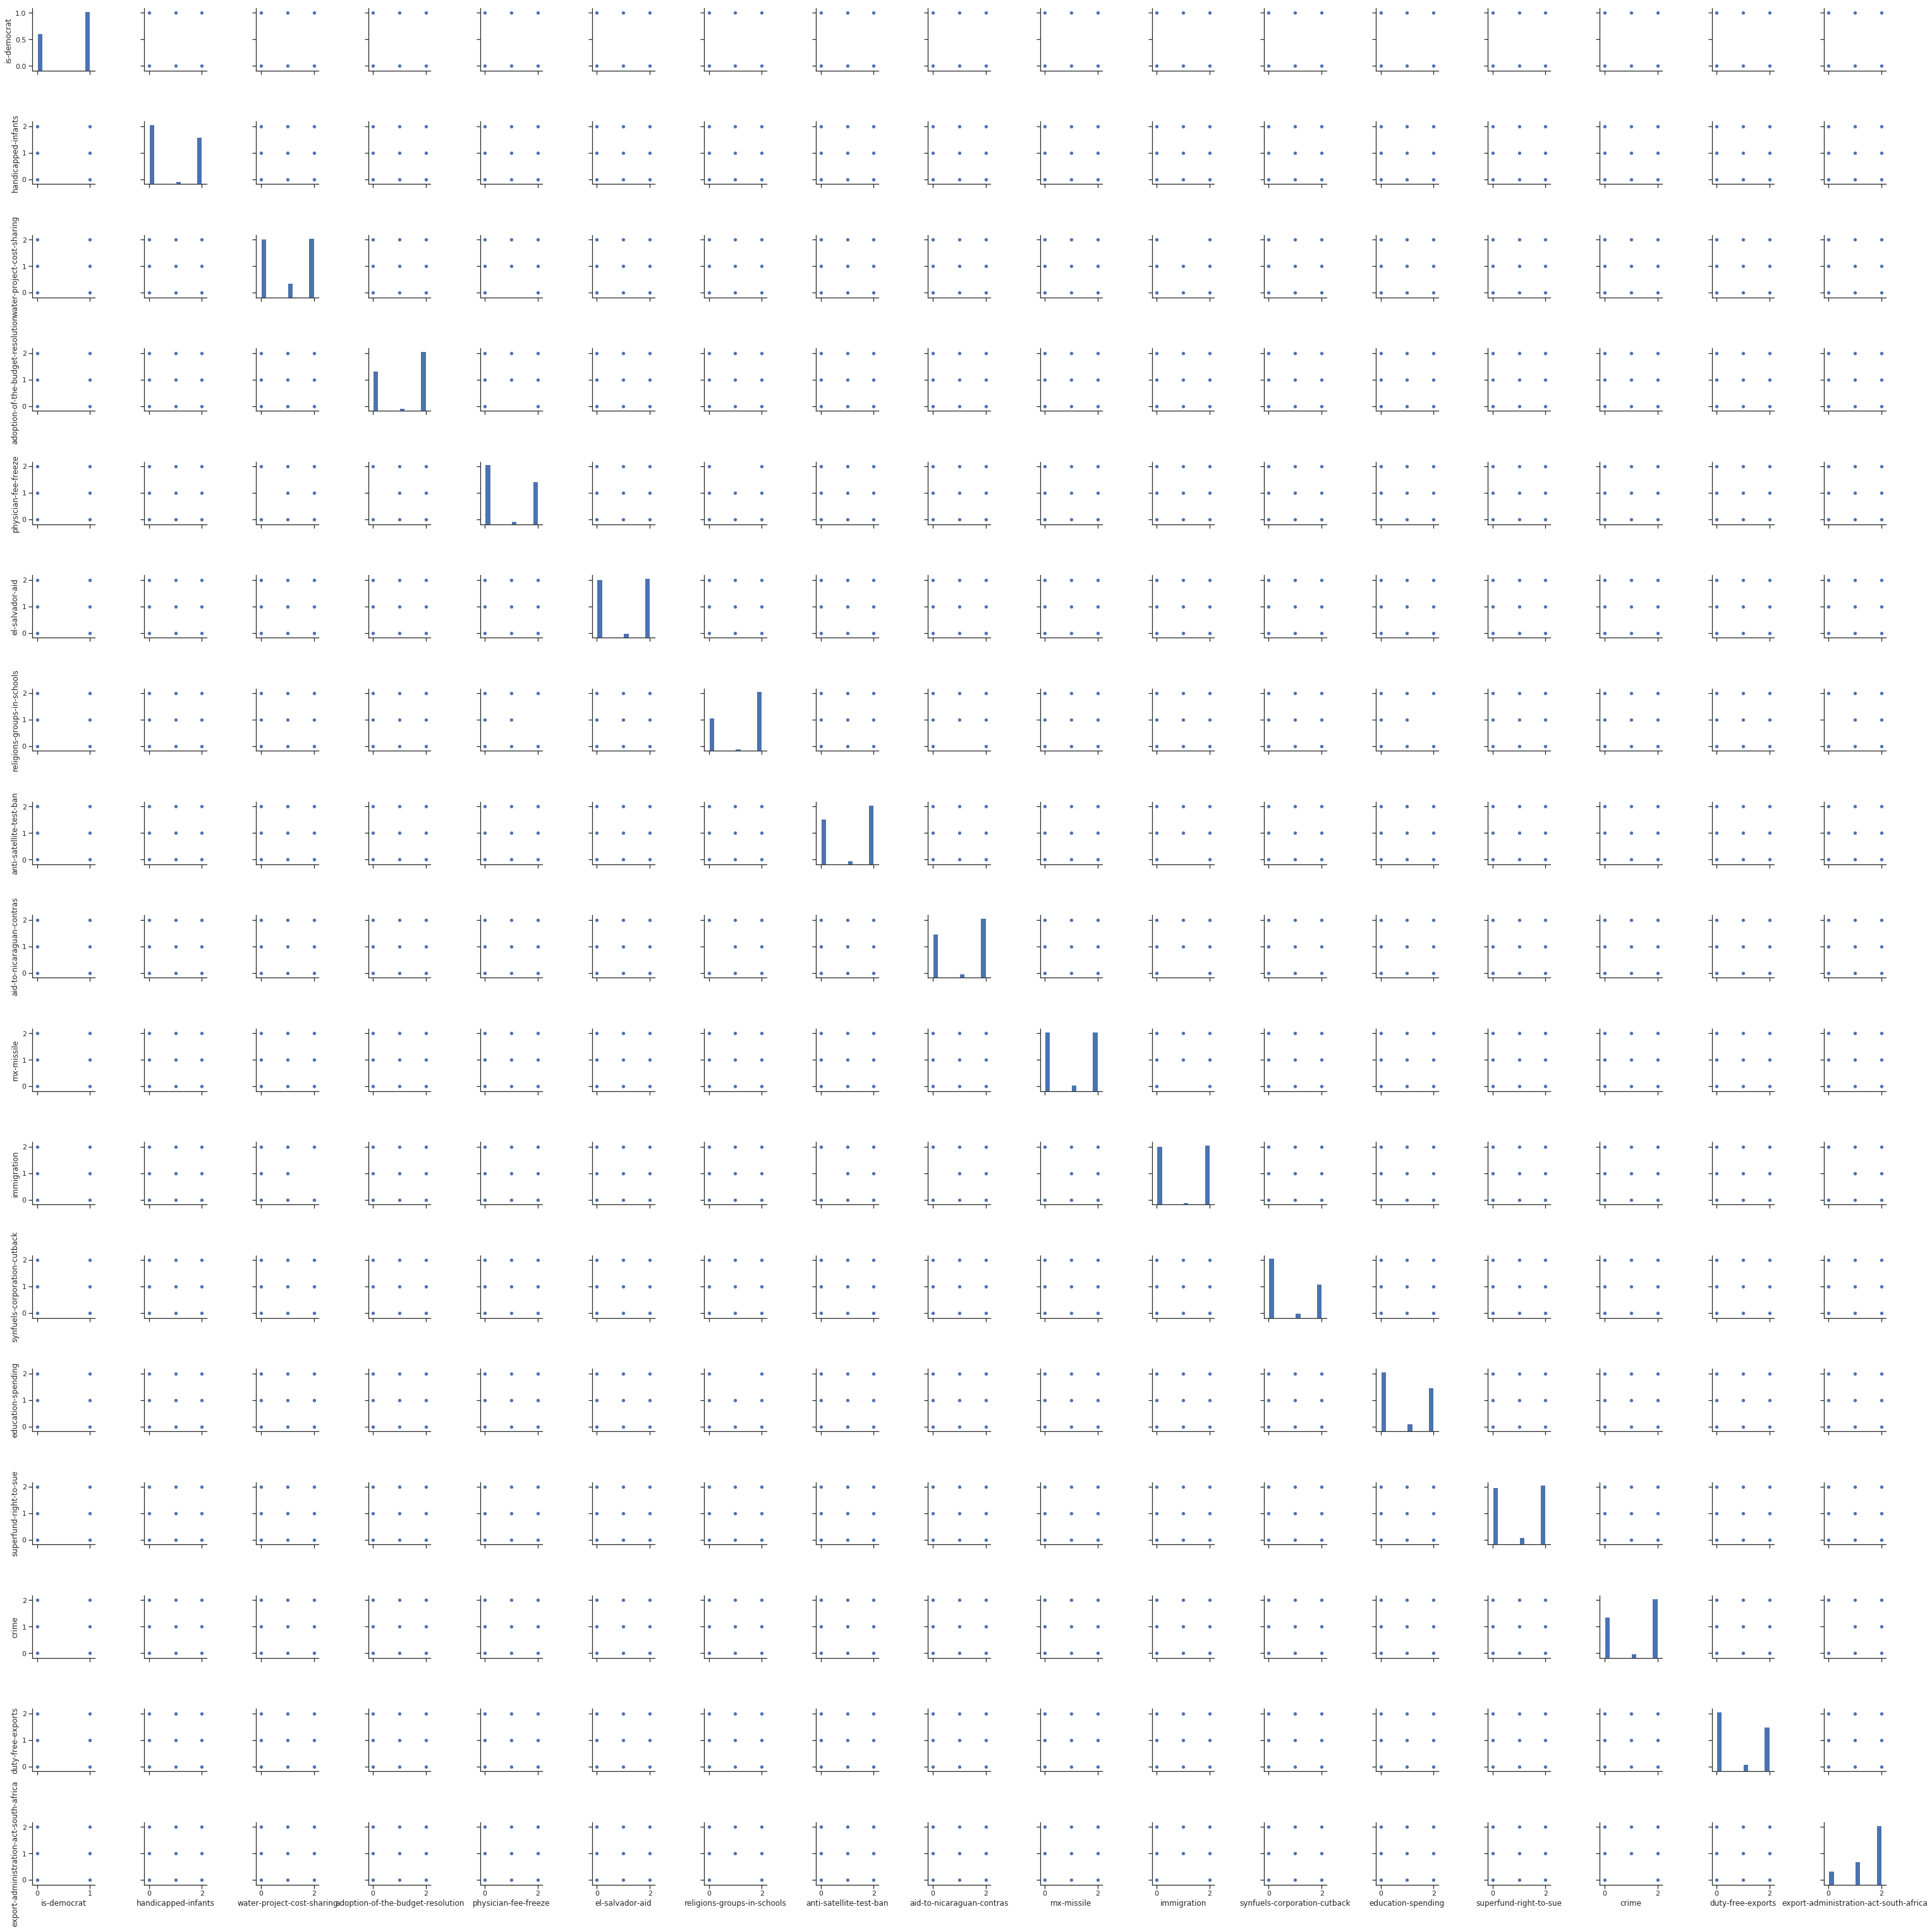

In [53]:
# Seaborn Pairplot

import seaborn as sns

sns.set(style = "ticks", color_codes = True)
g = sns.pairplot(df)

## Stretch Goals - Other types and sources of data

Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

In [80]:
!pip install requests
import requests


# request = requests.get('http://api.open-notify.org/astros.json')
# print(request.text)

# people = request.json()
# print(people)

# print("\nNumber of people in space: " + str(people['number']))


request2 = requests.get('https://xkcd.com/info.0.json')
print(xkcd_data.status_code)
print(xkcd_data.text)

xkcd_data = request2.json()
print()


200
{"month": "7", "num": 2173, "link": "", "year": "2019", "news": "", "safe_title": "Trained a Neural Net", "transcript": "", "alt": "It also works for anything you teach someone else to do. \"Oh yeah, I trained a pair of neural nets, Emily and Kevin, to respond to support tickets.\"", "img": "https://imgs.xkcd.com/comics/trained_a_neural_net.png", "title": "Trained a Neural Net", "day": "8"}


In [0]:
""